In [24]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [25]:
# mengimport file dataset
df = pd.read_csv('Customertravel.xls')

In [26]:
df.head()

In [27]:
# mengetahui info row dan column pada dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [28]:
# mengecek apakah ada missing value atau tidak
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [29]:
# perbandingan pada kolom fitur yang akan di analisa
target = df['Target'].value_counts().reset_index()
target.rename(columns={'index':'Target','Target':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Target,freq,percentage
0,0,730,76.52
1,1,224,23.48


In [30]:
df['Target'].value_counts()

0    730
1    224
Name: Target, dtype: int64

## Statistical Summary

In [31]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [32]:
# membagi kolom antara jenis numeric dan kategori
category = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

numeric = ['Age', 'ServicesOpted', 'Target']

In [33]:
# penjelasan mengenai kolom numeric
df[numeric].describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


* mean dan median antara fitur Age, ServicesOpted, dan Target tidak berbeda jauh sehingga dapat dikatakan simetris
* untuk usia pelanggan yang menggunakan jasa travel dan tour minimal di angka 27 tahun dan maksimal 38 tahun

In [34]:
# penjelasan mengenai kolom kategori
df[category].describe()

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


* Pada fitur Income diketahui yang paling mendominasi yaitu pelanggan dengan middle income
* Pelanggan paling banyak tidak melakukan penerbangan, tidak menghubungkan perusahaan dengan akun socialmedia mereka, dan tidak melakukan pemesanan hotel secara langsung 

## Univariate Analysis

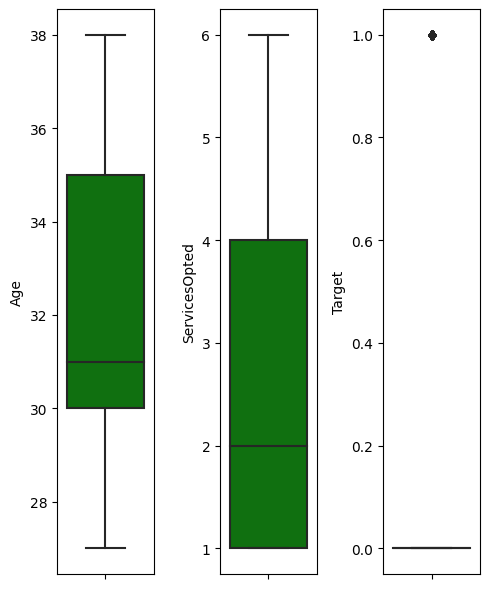

In [35]:
# adjust the figure size for better readability
plt.figure(figsize=(5,6))

# plotting
features = numeric
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

In [36]:
outlier = df['Target'].min()

df[df['Target'] == outlier]

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
6,34,No,Middle Income,4,Yes,Yes,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


## Exploratory Data Analysis

In [37]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [38]:
df[df['Age']==30]

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
8,30,No,Low Income,3,No,Yes,0
16,30,No,Low Income,1,Yes,Yes,0
17,30,Yes,High Income,1,Yes,No,0
...,...,...,...,...,...,...,...
937,30,Yes,Low Income,5,Yes,No,1
938,30,No,Middle Income,3,No,No,0
945,30,Yes,High Income,6,No,Yes,1
950,30,No,Middle Income,5,No,Yes,0


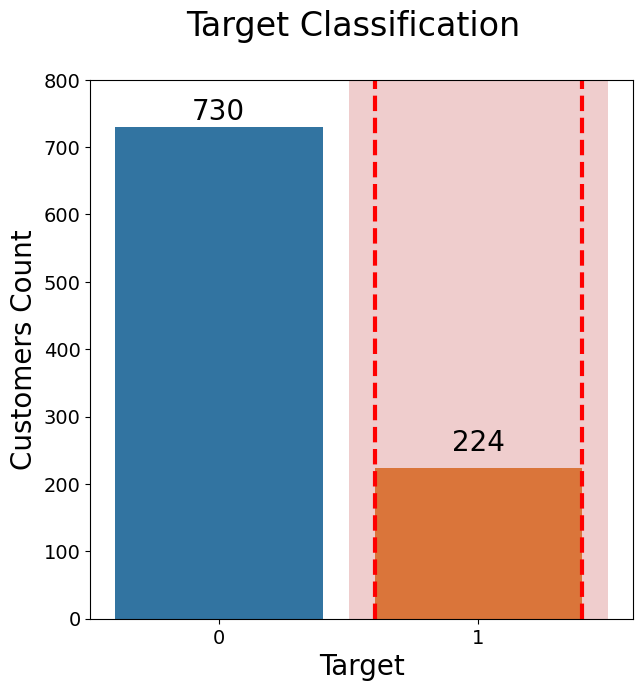

In [39]:
plt.figure(figsize=(7,7))
sns.countplot(x='Target', data=df)

plt.suptitle("Target Classification", fontsize=24)
plt.ylabel('Customers Count', fontsize=20) # x axis label
plt.xlabel('Target', fontsize=20) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

# add label
plt.text(x = 0, y = 740, s = "730", ha='center',fontsize = 20)
plt.text(x = 1, y = 250, s = "224", ha='center',fontsize = 20)

plt.ylim(0,800)
plt.stackplot(np.arange(0.5, 1.6 ,), [[800]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.4, color='red', linestyle='--', linewidth=3)
     

dari hasil diatas dapat memberikan informasi:

kebanyakan pelanggan di perusahaan tour and travels berada pada usia 30-an
layanan yang dipilih selama beberapa tahun terakhir adalah 'satu'
visualisasi target menunjukkan distribusi pelanggan kemungkinan churn yang lebih sedikit dibandingkan tidak churn, yang artinya terdapat banyak pelanggan yang loyal terhadap perusahaan. akan tetapi penting bagi perusahaan untuk mengurangi potensi pelanggan churn sehingga dapat memberikan keuntungan bagi perusahaan.

Text(0.5, 1.0, 'Age Distribution based on Churn Category')

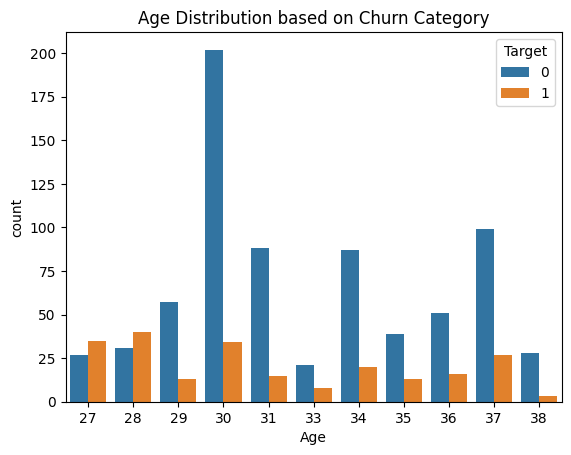

In [40]:
sns.countplot(data=df,
            hue='Target',
            x='Age')
plt.title("Age Distribution based on Churn Category")

* Dari data diatas dapat kita simpulkan pelanggan yang paling tinggi melakukan churn yaitu di usia 27 tahun dan 28 tahun, untuk usia paling rendah yaitu 38 tahun
* pelangan paling banyak di dominasi usia 30 tahun, sedangkan paling sedikit di usia 33 tahun

In [41]:
df['FrequentFlyer'].value_counts()

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

Text(0.5, 1.0, 'Frequency Flyer Distribution based on Churn Category')

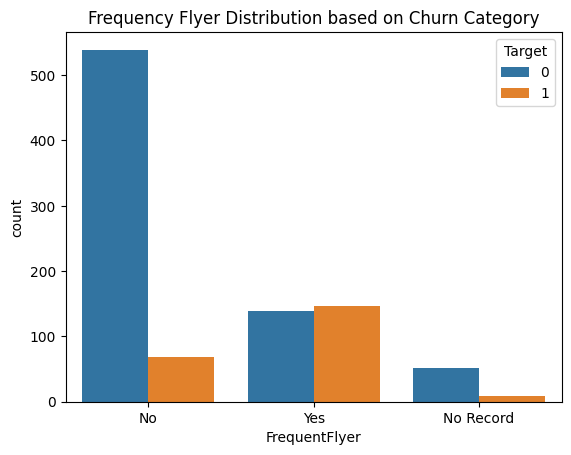

In [42]:
sns.countplot(data=df,
            hue='Target',
            x='FrequentFlyer')
plt.title("Frequency Flyer Distribution based on Churn Category")

* Dari data diatas dikatakan bahwa pelanggan yang paling banyak yaitu yang tidak melakukan penerbangan dalam menggunakan jasa travel dan sedikit juga dari tingkat churn
* Untuk pelanggan yang sering melakukan penerbangan yang paling banyak melakukan churn 
* Jika dilihat dari tingkat churn, pelanggan yang sering melakukan penerbangan juga yang paling banyak melakukan churn (Bisa dilihat dari grafik warna Orange)

In [43]:
df['AnnualIncomeClass'].value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

Text(0.5, 1.0, 'Annual Income Distribution based on Churn Category')

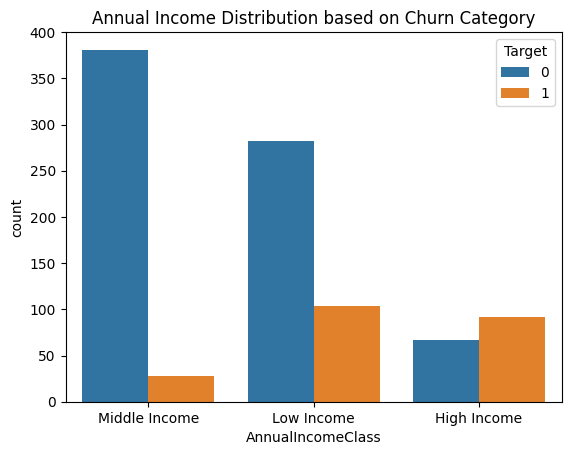

In [44]:
sns.countplot(data=df,
            hue='Target',
            x='AnnualIncomeClass')
plt.title("Annual Income Distribution based on Churn Category")

* Untuk pelanggan paling banyak dari kelas LowIncome, tetapi mereka lebih rendah untuk tingkat churn
* Tetapi jika melihat dari semua kategori tingkat churn, kategori LowIncome inilah yang paling tinggi melakukan churn, dibandingkan dengan MiddleIncome dan HighIncome (Bisa dilihat dari grafik berwarna Orange)

In [45]:
df['ServicesOpted'].value_counts()

1    404
2    176
3    124
4    117
5     69
6     64
Name: ServicesOpted, dtype: int64

Text(0.5, 1.0, 'ServicesOpted Distribution based on Churn Category')

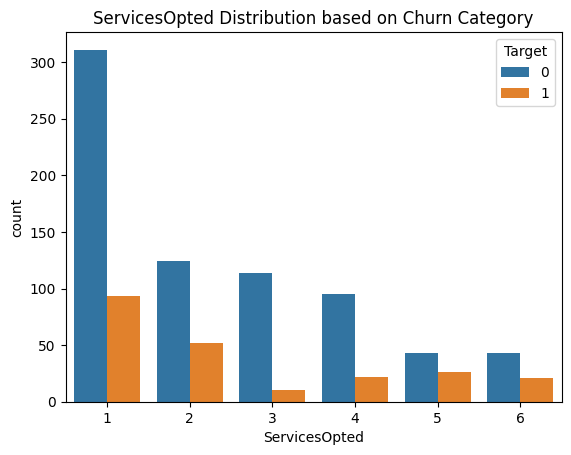

In [46]:
sns.countplot(data=df,
            hue='Target',
              x='ServicesOpted')
plt.title("ServicesOpted Distribution based on Churn Category")

* Untuk pelanggan yang paling banyak hanya menggunakan jasa servis 1 dari perusahaan jasa travel
* Untuk pelanggan yang hanya menggunakan servis sedikit dari perusahaan jasa travel, memiliki tingkat churn paling tinggi dari kategori yang lain 


In [47]:
df['AccountSyncedToSocialMedia'].value_counts()

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

Text(0.5, 1.0, 'Account Sync to Social Media Distribution based on Churn Category')

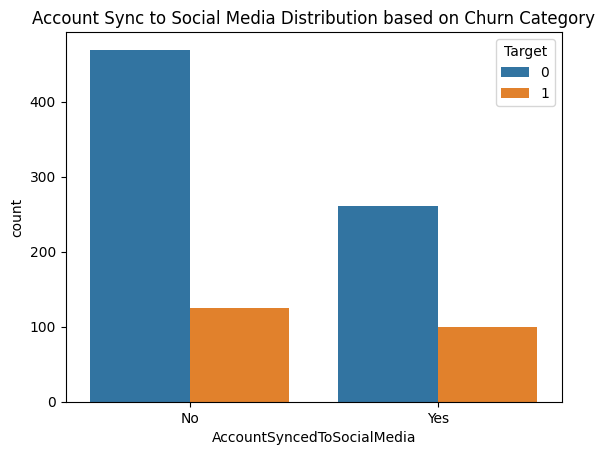

In [48]:
sns.countplot(data=df,
            hue='Target',
            x='AccountSyncedToSocialMedia')
plt.title("Account Sync to Social Media Distribution based on Churn Category")

* Untuk pelanggan yang tidak menghubungkan dengan akun social media mereka memiliki tingkat churn paling tinggi dan juga menjadi pelanggan paling banyak 

In [49]:
df['BookedHotelOrNot'].value_counts()

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

Text(0.5, 1.0, 'Booked Hotel Distribution based on Churn Category')

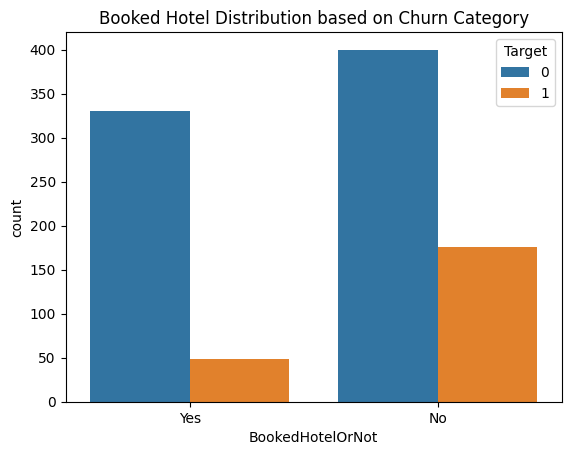

In [50]:
sns.countplot(data=df,
            hue='Target',
            x='BookedHotelOrNot')
plt.title("Booked Hotel Distribution based on Churn Category")

* Mayoritas pelanggan yang tidak melakukan pemesanan penginapan hotel paling banyak melakukan churn 

## Encoding 

Didalam pengolahan sebuah machine learning, sebuah data yang akan kita olah harus bersifat numeric maka dari itu disini saya mengubah value dari setiap kolom kategori menjadi numeric. Dengan berbagai metode mulai dari dari Label Encoding, hingga One Hot Encoding

In [51]:
# split data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.8, random_state=42)

In [52]:
df.head(3)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0


In [53]:
df_code = df.copy()

In [54]:
df_code

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [55]:
df_code = df_code.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}}) #hierarki encoding atau dictionary encoding
#train = train.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})
#test = test.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})

In [56]:
dummies = ['BookedHotelOrNot', 'AccountSyncedToSocialMedia', 'FrequentFlyer']
df_code = pd.get_dummies(df_code, columns = dummies, drop_first=True)
#train = pd.get_dummies(train, columns = dummies, drop_first=True)
#test = pd.get_dummies(test, columns = dummies, drop_first=True)

In [57]:
df_code.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)
#train.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)
#test.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)

In [58]:
df_code.head()

,Age,AnnualIncomeClass,ServicesOpted,Target,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
0,34,1,6,0,1,0,0,0
1,34,0,5,1,0,1,0,1
2,37,1,3,0,0,1,0,0
3,30,1,2,0,0,0,0,0
4,30,0,1,0,0,0,0,0


In [59]:
df_code.sample(5)

,Age,AnnualIncomeClass,ServicesOpted,Target,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
342,30,1,4,0,1,1,1,0
675,29,1,6,0,1,0,0,0
858,29,1,1,0,1,0,0,0
89,30,2,1,0,0,0,0,1
251,30,1,4,0,0,0,0,0


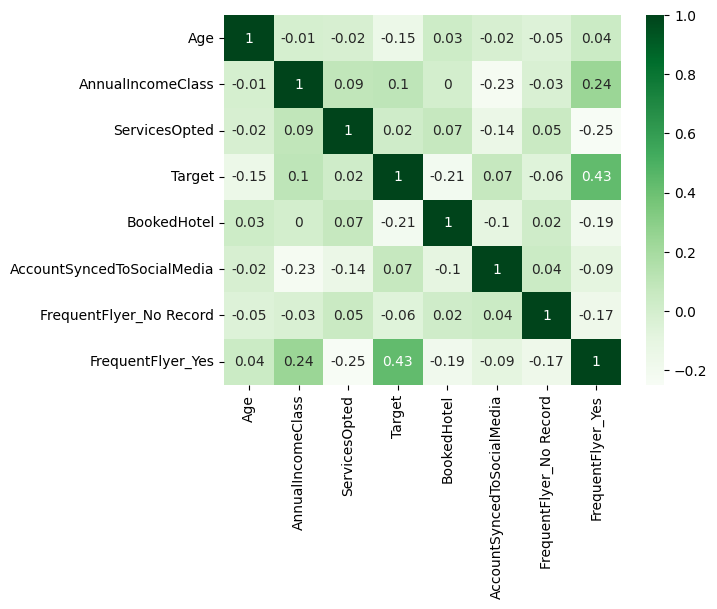

In [60]:
#visualisasi korelasi antara masing-masing kolom
sns.heatmap(np.round(df_code.corr(method ='spearman'), 2), annot=True,  cmap='Greens');

## Baseline

In [61]:
# encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# split data
from sklearn.model_selection import train_test_split

# model -> cara manggil model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [63]:
def evaluate(model, x_test, y_test, x_train, y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

## Modelling KNN

In [68]:
train

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
292,29,No,Low Income,1,Yes,No,0
891,31,No,Middle Income,2,No,No,0
736,33,Yes,Low Income,1,Yes,Yes,0
109,27,Yes,Low Income,1,Yes,No,1
77,34,Yes,High Income,1,Yes,No,0
...,...,...,...,...,...,...,...
106,37,Yes,Low Income,1,Yes,No,0
270,37,No,Middle Income,6,No,Yes,0
860,37,No,Middle Income,4,No,Yes,0
435,37,Yes,Low Income,6,No,Yes,0


In [65]:
test

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
199,33,No Record,Low Income,2,Yes,No,1
422,37,No,Middle Income,3,Yes,No,0
695,30,No,Middle Income,2,No,Yes,0
751,30,No,Low Income,2,No,No,0
388,30,No,Low Income,1,Yes,No,0
...,...,...,...,...,...,...,...
33,35,Yes,High Income,1,No,No,1
31,34,No,Low Income,2,No,No,0
712,30,No,Low Income,1,Yes,Yes,0
321,30,Yes,High Income,4,No,No,1


In [ ]:
# X_train = train.drop('Target',axis=1)
# y_train = train['Target']
# X_test = test.drop('Target',axis=1)
# y_test = test['Target']

In [71]:
X = df_code.drop('Target', axis=1) #predictor
y = df_code['Target'] #target

In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3, #train : test = 70:30
                                                random_state = 42)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [73]:
knn_clf.fit(X_train,y_train) #KNN sedang melatih dirinya kedalam data train
y_pred_test = knn_clf.predict(X_test) #KNN memprediksi ke data test predictor (Xtest)
y_pred_train = knn_clf.predict(X_train) #KNN memprediksi ke data train predictor (Xtrain)

In [74]:
evaluate(knn_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       511
           1       0.85      0.71      0.77       156

    accuracy                           0.90       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.90      0.90      0.90       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 110
True Negative: 492
False Positive: 19
False Negative: 46

Accuracy Data Train: 0.9025487256371814
Precision Data Train: 0.8527131782945736
Recall Data Train: 0.7051282051282052
F1-Score Data Train: 0.7719298245614036
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.65      0.71        68

    accuracy                           0.87       287
   macro avg       0.84      0.80      0.81     

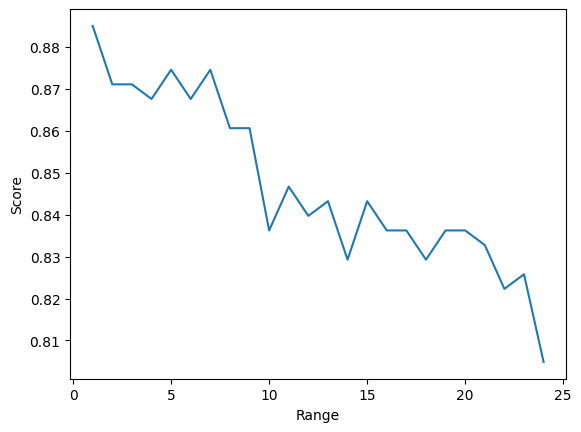

In [61]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [75]:
knn_model = KNeighborsClassifier(n_neighbors = 1) #set K neighbor above
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
score_knn = knn_model.score(X_test,y_test)
print("KNN accuracy according to K=11 is :",score_knn)

KNN accuracy according to K=11 is : 0.8850174216027874


In [76]:
evaluate(knn_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       511
           1       0.88      0.90      0.89       156

    accuracy                           0.95       667
   macro avg       0.92      0.93      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 140
True Negative: 492
False Positive: 19
False Negative: 16

Accuracy Data Train: 0.9475262368815592
Precision Data Train: 0.8805031446540881
Recall Data Train: 0.8974358974358975
F1-Score Data Train: 0.8888888888888888
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       219
           1       0.79      0.71      0.74        68

    accuracy                           0.89       287
   macro avg       0.85      0.82      0.84     

## Baseline Modelling Random Forest

In [77]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [78]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
evaluate(rf_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       511
           1       0.92      0.87      0.89       156

    accuracy                           0.95       667
   macro avg       0.94      0.92      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 135
True Negative: 500
False Positive: 11
False Negative: 21

Accuracy Data Train: 0.952023988005997
Precision Data Train: 0.9246575342465754
Recall Data Train: 0.8653846153846154
F1-Score Data Train: 0.8940397350993378
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.66      0.72        68

    accuracy                           0.88       287
   macro avg       0.84      0.80      0.82      

## Decision Tree

In [80]:
df_clf = DecisionTreeClassifier()
df_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
evaluate(df_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       511
           1       0.97      0.82      0.89       156

    accuracy                           0.95       667
   macro avg       0.96      0.91      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 128
True Negative: 507
False Positive: 4
False Negative: 28

Accuracy Data Train: 0.952023988005997
Precision Data Train: 0.9696969696969697
Recall Data Train: 0.8205128205128205
F1-Score Data Train: 0.8888888888888888
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       219
           1       0.79      0.72      0.75        68

    accuracy                           0.89       287
   macro avg       0.85      0.83      0.84       

### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [83]:
evaluate(lr_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       511
           1       0.64      0.40      0.49       156

    accuracy                           0.81       667
   macro avg       0.74      0.66      0.69       667
weighted avg       0.79      0.81      0.79       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 62
True Negative: 476
False Positive: 35
False Negative: 94

Accuracy Data Train: 0.8065967016491754
Precision Data Train: 0.6391752577319587
Recall Data Train: 0.3974358974358974
F1-Score Data Train: 0.49011857707509887
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       219
           1       0.65      0.38      0.48        68

    accuracy                           0.80       287
   macro avg       0.74      0.66      0.68     

### SVM

In [68]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 42)
svc_model.fit(X_train,y_train)

SVC(random_state=42)

In [69]:
evaluate(svc_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.7661169415292354
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       511
           1       0.00      0.00      0.00       156

    accuracy                           0.77       667
   macro avg       0.38      0.50      0.43       667
weighted avg       0.59      0.77      0.66       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 511
False Positive: 0
False Negative: 156

Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan
======= Data Test =======
Accuracy: 0.7630662020905923
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       219
           1       0.00      0.00      0.00        68

    accuracy                           0.76       287
   macro avg       0.38      0.50      0.43       287
weighted avg

## Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [85]:
evaluate(nb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       511
           1       0.54      0.60      0.57       156

    accuracy                           0.79       667
   macro avg       0.71      0.72      0.72       667
weighted avg       0.80      0.79      0.79       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 94
True Negative: 432
False Positive: 79
False Negative: 62

Accuracy Data Train: 0.7886056971514243
Precision Data Train: 0.5433526011560693
Recall Data Train: 0.6025641025641025
F1-Score Data Train: 0.5714285714285714
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       219
           1       0.58      0.62      0.60        68

    accuracy                           0.80       287
   macro avg       0.73      0.74      0.73      

## Gradient Boosting

In [86]:
#Fit and Train (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [87]:
evaluate(gbt_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       511
           1       0.88      0.81      0.85       156

    accuracy                           0.93       667
   macro avg       0.91      0.89      0.90       667
weighted avg       0.93      0.93      0.93       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 127
True Negative: 494
False Positive: 17
False Negative: 29

Accuracy Data Train: 0.9310344827586207
Precision Data Train: 0.8819444444444444
Recall Data Train: 0.8141025641025641
F1-Score Data Train: 0.8466666666666667
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       219
           1       0.78      0.74      0.76        68

    accuracy                           0.89       287
   macro avg       0.85      0.84      0.84     

## XGBoost

In [88]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
evaluate(xgb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       511
           1       0.95      0.83      0.89       156

    accuracy                           0.95       667
   macro avg       0.95      0.91      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 130
True Negative: 504
False Positive: 7
False Negative: 26

Accuracy Data Train: 0.9505247376311844
Precision Data Train: 0.948905109489051
Recall Data Train: 0.8333333333333334
F1-Score Data Train: 0.8873720136518771
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       219
           1       0.83      0.74      0.78        68

    accuracy                           0.90       287
   macro avg       0.88      0.84      0.86       

## CatBoost

In [90]:
from catboost import CatBoostClassifier, Pool
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

Learning rate set to 0.008666
0:	learn: 0.6884063	total: 143ms	remaining: 2m 22s
1:	learn: 0.6790400	total: 144ms	remaining: 1m 12s
2:	learn: 0.6693243	total: 146ms	remaining: 48.5s
3:	learn: 0.6605527	total: 147ms	remaining: 36.7s
4:	learn: 0.6543687	total: 148ms	remaining: 29.5s
5:	learn: 0.6446484	total: 150ms	remaining: 24.8s
6:	learn: 0.6377352	total: 151ms	remaining: 21.4s
7:	learn: 0.6311987	total: 152ms	remaining: 18.8s
8:	learn: 0.6211184	total: 152ms	remaining: 16.8s
9:	learn: 0.6167343	total: 153ms	remaining: 15.2s
10:	learn: 0.6070623	total: 154ms	remaining: 13.8s
11:	learn: 0.5984274	total: 155ms	remaining: 12.7s
12:	learn: 0.5950738	total: 155ms	remaining: 11.8s
13:	learn: 0.5894233	total: 156ms	remaining: 11s
14:	learn: 0.5862322	total: 157ms	remaining: 10.3s
15:	learn: 0.5796072	total: 158ms	remaining: 9.74s
16:	learn: 0.5762516	total: 159ms	remaining: 9.2s
17:	learn: 0.5675653	total: 160ms	remaining: 8.72s
18:	learn: 0.5591314	total: 161ms	remaining: 8.3s
19:	learn: 0.

260:	learn: 0.2068118	total: 360ms	remaining: 1.02s
261:	learn: 0.2065010	total: 361ms	remaining: 1.02s
262:	learn: 0.2060576	total: 362ms	remaining: 1.01s
263:	learn: 0.2056408	total: 364ms	remaining: 1.01s
264:	learn: 0.2053900	total: 365ms	remaining: 1.01s
265:	learn: 0.2049821	total: 366ms	remaining: 1.01s
266:	learn: 0.2048913	total: 366ms	remaining: 1s
267:	learn: 0.2046634	total: 367ms	remaining: 1s
268:	learn: 0.2044608	total: 368ms	remaining: 999ms
269:	learn: 0.2042741	total: 369ms	remaining: 996ms
270:	learn: 0.2039169	total: 369ms	remaining: 993ms
271:	learn: 0.2038738	total: 370ms	remaining: 990ms
272:	learn: 0.2036125	total: 371ms	remaining: 987ms
273:	learn: 0.2032586	total: 371ms	remaining: 984ms
274:	learn: 0.2029196	total: 372ms	remaining: 981ms
275:	learn: 0.2024656	total: 373ms	remaining: 979ms
276:	learn: 0.2020311	total: 375ms	remaining: 978ms
277:	learn: 0.2017999	total: 376ms	remaining: 976ms
278:	learn: 0.2015042	total: 376ms	remaining: 973ms
279:	learn: 0.2012

436:	learn: 0.1704278	total: 534ms	remaining: 688ms
437:	learn: 0.1702311	total: 538ms	remaining: 690ms
438:	learn: 0.1701289	total: 538ms	remaining: 688ms
439:	learn: 0.1699048	total: 539ms	remaining: 686ms
440:	learn: 0.1697796	total: 540ms	remaining: 685ms
441:	learn: 0.1695747	total: 542ms	remaining: 684ms
442:	learn: 0.1694178	total: 544ms	remaining: 683ms
443:	learn: 0.1693398	total: 546ms	remaining: 683ms
444:	learn: 0.1691366	total: 547ms	remaining: 682ms
445:	learn: 0.1690261	total: 551ms	remaining: 684ms
446:	learn: 0.1689350	total: 552ms	remaining: 683ms
447:	learn: 0.1687688	total: 553ms	remaining: 681ms
448:	learn: 0.1686372	total: 553ms	remaining: 679ms
449:	learn: 0.1685196	total: 554ms	remaining: 677ms
450:	learn: 0.1683176	total: 555ms	remaining: 676ms
451:	learn: 0.1681605	total: 558ms	remaining: 676ms
452:	learn: 0.1679406	total: 560ms	remaining: 676ms
453:	learn: 0.1679057	total: 562ms	remaining: 676ms
454:	learn: 0.1678747	total: 566ms	remaining: 678ms
455:	learn: 

667:	learn: 0.1468572	total: 891ms	remaining: 443ms
668:	learn: 0.1467737	total: 892ms	remaining: 442ms
669:	learn: 0.1467173	total: 894ms	remaining: 440ms
670:	learn: 0.1466601	total: 895ms	remaining: 439ms
671:	learn: 0.1466007	total: 897ms	remaining: 438ms
672:	learn: 0.1465370	total: 898ms	remaining: 436ms
673:	learn: 0.1464800	total: 899ms	remaining: 435ms
674:	learn: 0.1463814	total: 901ms	remaining: 434ms
675:	learn: 0.1462133	total: 902ms	remaining: 432ms
676:	learn: 0.1460895	total: 904ms	remaining: 431ms
677:	learn: 0.1459839	total: 905ms	remaining: 430ms
678:	learn: 0.1458929	total: 906ms	remaining: 428ms
679:	learn: 0.1457910	total: 907ms	remaining: 427ms
680:	learn: 0.1457359	total: 909ms	remaining: 426ms
681:	learn: 0.1456531	total: 910ms	remaining: 424ms
682:	learn: 0.1456513	total: 911ms	remaining: 423ms
683:	learn: 0.1456105	total: 912ms	remaining: 421ms
684:	learn: 0.1455028	total: 913ms	remaining: 420ms
685:	learn: 0.1454029	total: 915ms	remaining: 419ms
686:	learn: 

937:	learn: 0.1277029	total: 1.26s	remaining: 83ms
938:	learn: 0.1276675	total: 1.26s	remaining: 81.7ms
939:	learn: 0.1276346	total: 1.26s	remaining: 80.3ms
940:	learn: 0.1275586	total: 1.26s	remaining: 79ms
941:	learn: 0.1275109	total: 1.26s	remaining: 77.7ms
942:	learn: 0.1274381	total: 1.26s	remaining: 76.3ms
943:	learn: 0.1273795	total: 1.26s	remaining: 75ms
944:	learn: 0.1273420	total: 1.26s	remaining: 73.6ms
945:	learn: 0.1273064	total: 1.27s	remaining: 72.3ms
946:	learn: 0.1272442	total: 1.27s	remaining: 71ms
947:	learn: 0.1271873	total: 1.27s	remaining: 69.6ms
948:	learn: 0.1271546	total: 1.27s	remaining: 68.3ms
949:	learn: 0.1270811	total: 1.27s	remaining: 67ms
950:	learn: 0.1270469	total: 1.27s	remaining: 65.6ms
951:	learn: 0.1269938	total: 1.27s	remaining: 64.3ms
952:	learn: 0.1269601	total: 1.28s	remaining: 62.9ms
953:	learn: 0.1268985	total: 1.28s	remaining: 61.6ms
954:	learn: 0.1268479	total: 1.28s	remaining: 60.3ms
955:	learn: 0.1267776	total: 1.28s	remaining: 58.9ms
956

In [91]:
evaluate(cb, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       511
           1       0.91      0.85      0.88       156

    accuracy                           0.95       667
   macro avg       0.93      0.91      0.92       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 133
True Negative: 498
False Positive: 13
False Negative: 23

Accuracy Data Train: 0.9460269865067467
Precision Data Train: 0.910958904109589
Recall Data Train: 0.8525641025641025
F1-Score Data Train: 0.880794701986755
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       219
           1       0.79      0.71      0.74        68

    accuracy                           0.89       287
   macro avg       0.85      0.82      0.84       

## Light Beam

In [92]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train,y_train)

LGBMClassifier()

In [93]:
evaluate(lgb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       511
           1       0.89      0.87      0.88       156

    accuracy                           0.94       667
   macro avg       0.93      0.92      0.92       667
weighted avg       0.94      0.94      0.94       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 135
True Negative: 495
False Positive: 16
False Negative: 21

Accuracy Data Train: 0.9445277361319341
Precision Data Train: 0.8940397350993378
Recall Data Train: 0.8653846153846154
F1-Score Data Train: 0.8794788273615636
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       219
           1       0.82      0.75      0.78        68

    accuracy                           0.90       287
   macro avg       0.87      0.85      0.86     

## Handling Imbalance

selisih precisi, recall, f1
1. lgbm : 7, 11 ,9
2. gb : 10, 8, 9
3. xgb: 11, 10 ,10
*kita bisa lihat 3 best model dari semua base line diatas, kita akan treate lgbm*

## 1. Undersampling : RandomUnderSampler

In [94]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('Before Handling RandomUnderSampling',Counter(y_train))

# define undersample strategy
undersample = RandomUnderSampler()

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train,y_train)

# summarize class distribution
print('After Handling RandomUnderSampling',Counter(y_train_under))

Before Handling RandomUnderSampling Counter({0: 511, 1: 156})
After Handling RandomUnderSampling Counter({0: 156, 1: 156})


## Light Beam

In [95]:
lgb_model_under = lgb.LGBMClassifier()
lgb_model_under.fit(X_train_under, y_train_under)

LGBMClassifier()

In [96]:
evaluate(lgb_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       156
           1       0.91      1.00      0.95       156

    accuracy                           0.95       312
   macro avg       0.95      0.95      0.95       312
weighted avg       0.95      0.95      0.95       312

------
Assuming 1 as positive, we get for Data Train:

True Positive: 156
True Negative: 140
False Positive: 16
False Negative: 0

Accuracy Data Train: 0.9487179487179487
Precision Data Train: 0.9069767441860465
Recall Data Train: 1.0
F1-Score Data Train: 0.951219512195122
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       219
           1       0.70      0.94      0.80        68

    accuracy                           0.89       287
   macro avg       0.84      0.91      0.86       287
weighted av

## Gradient Boosting

In [97]:
gbt_model_under = GradientBoostingClassifier()
gbt_model_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier()

In [98]:
evaluate(gbt_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       156
           1       0.92      0.98      0.95       156

    accuracy                           0.95       312
   macro avg       0.95      0.95      0.95       312
weighted avg       0.95      0.95      0.95       312

------
Assuming 1 as positive, we get for Data Train:

True Positive: 153
True Negative: 142
False Positive: 14
False Negative: 3

Accuracy Data Train: 0.9455128205128205
Precision Data Train: 0.9161676646706587
Recall Data Train: 0.9807692307692307
F1-Score Data Train: 0.9473684210526315
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       219
           1       0.67      0.91      0.78        68

    accuracy                           0.87       287
   macro avg       0.82      0.89      0.84      

## Oversampling : SMOTE

In [99]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('Before Handling SMOTE',Counter(y_train))

# define undersample strategy
smote = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# summarize class distribution
print('After Handling SMOTE',Counter(y_train_SMOTE))

Before Handling SMOTE Counter({0: 511, 1: 156})
After Handling SMOTE Counter({0: 511, 1: 511})


### Light Beam

In [100]:
lgb_model_smote = lgb.LGBMClassifier()
lgb_model_smote.fit(X_train_SMOTE, y_train_SMOTE)

LGBMClassifier()

In [101]:
evaluate(lgb_model_smote, x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       511
           1       0.91      0.98      0.95       511

    accuracy                           0.94      1022
   macro avg       0.95      0.94      0.94      1022
weighted avg       0.95      0.94      0.94      1022

------
Assuming 1 as positive, we get for Data Train:

True Positive: 500
True Negative: 464
False Positive: 47
False Negative: 11

Accuracy Data Train: 0.9432485322896281
Precision Data Train: 0.9140767824497258
Recall Data Train: 0.9784735812133072
F1-Score Data Train: 0.945179584120983
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       219
           1       0.70      0.87      0.78        68

    accuracy                           0.88       287
   macro avg       0.83      0.88      0.85      

### Gradient Boosting

In [102]:
gbt_model_smote = GradientBoostingClassifier()
gbt_model_smote.fit(X_train_SMOTE, y_train_SMOTE)

GradientBoostingClassifier()

In [103]:
evaluate(gbt_model_smote, x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       511
           1       0.89      0.97      0.93       511

    accuracy                           0.93      1022
   macro avg       0.93      0.93      0.93      1022
weighted avg       0.93      0.93      0.93      1022

------
Assuming 1 as positive, we get for Data Train:

True Positive: 496
True Negative: 452
False Positive: 59
False Negative: 15

Accuracy Data Train: 0.9275929549902152
Precision Data Train: 0.8936936936936937
Recall Data Train: 0.9706457925636007
F1-Score Data Train: 0.9305816135084427
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       219
           1       0.68      0.91      0.78        68

    accuracy                           0.88       287
   macro avg       0.83      0.89      0.85     

In [97]:
y_pred_gbt_smote = gbt_model_smote.predict(X_test)
y_pred_gbt_smote

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0], dtype=int64)

In [99]:
predict_gbt = pd.DataFrame(gbt_model_smote.predict(X_test), columns=['hasil_prediksi_churn']) 
predict_gbt

,hasil_prediksi_churn
0,1
1,0
2,0
3,0
4,0
...,...
282,1
283,0
284,0
285,1


In [101]:
df_result_pred_rf = pd.concat([X_test.reset_index(drop='True'),predict_gbt.reset_index(drop='True')],axis=1)
df_result_pred_rf

,Age,AnnualIncomeClass,ServicesOpted,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes,hasil_prediksi_churn
0,33,0,2,0,1,1,0,1
1,37,1,3,0,1,0,0,0
2,30,1,2,1,0,0,0,0
3,30,0,2,0,0,0,0,0
4,30,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
282,35,0,3,0,0,0,1,1
283,28,1,2,0,1,0,0,0
284,27,1,4,1,0,0,0,0
285,29,2,1,0,1,0,1,1


In [105]:
only_class_1 = df_result_pred_rf[df_result_pred_rf['hasil_prediksi_churn']==1]
only_class_1

,Age,AnnualIncomeClass,ServicesOpted,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes,hasil_prediksi_churn
0,33,0,2,0,1,1,0,1
6,35,0,2,0,1,0,1,1
13,28,2,4,0,0,0,1,1
14,29,0,5,0,1,0,0,1
15,31,0,4,0,1,0,0,1
...,...,...,...,...,...,...,...,...
268,35,0,3,1,0,0,1,1
269,34,0,2,0,1,0,0,1
278,30,2,1,0,0,0,1,1
282,35,0,3,0,0,0,1,1
